In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

In [3]:
class Financial_data_analysis:
    def __init__(self, ticker):
        self.ticker = ticker
        self.data = yf.download(self.ticker, start='2021-11-09', end='2022-02-25')
        self.data.reset_index(inplace=True)
        date_to_drop = pd.to_datetime('2022-01-18') 
        self.data = self.data[self.data['Date'] != date_to_drop]

        self.date_list = self.data['Date'].dt.strftime('%Y-%m-%d').tolist()
        
    def get_the_data(self):
        ticker = self.ticker
        data = self.data
        
        data['MA_5'] = None
        # For first day, we use open price as the proxy
        data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])
        # From 2nd to 5th day:
        # use closing price mean of precious days
        for i in range(1, min(5, len(data))):
            available_closes = data.iloc[:i]['Close']
            data.iloc[i, data.columns.get_loc('MA_5')] = available_closes.mean()
        
        # Regular MA calculation after the first 5 days
        for i in range(5, len(data)):
            data.iloc[i, data.columns.get_loc('MA_5')] = data.iloc[i-5:i]['Close'].mean()

        filename = f"{self.ticker}_financial_data.csv"
        data.to_csv(filename, index=False)
        
        return data

    def plot_opening_trend(self):
        data = self.get_the_data()
        
        data.plot(x='Date', y='Open', figsize=(10, 6), linewidth=3, color = '#4285f4')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Price ($)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_opening.jpg", dpi=1000)
        plt.show()

    def plot_closing_trend(self):
        data = self.get_the_data()
        data.plot(x='Date', y='Close', figsize=(10, 6), linewidth=3, color = '#aa6894')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Price ($)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_closing.jpg", dpi=1000)
        plt.show()

    def plot_volume_trend(self):
        data = self.get_the_data()
        data.plot(x='Date', y='Volume', figsize=(10, 6), linewidth=3, color = '#34a853')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Volume (number of shares)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_volume.jpg", dpi=1000)
        plt.show()

    def plot_highest_price_trend(self):
        data = self.get_the_data()
        data.plot(x='Date', y='High', figsize=(10, 6), linewidth=3, color = '#fbbc05')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Price ($)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_high.jpg", dpi=1000)
        plt.show()

    def plot_lowest_price_trend(self):
        data = self.get_the_data()
        data.plot(x='Date', y='Low', figsize=(10, 6), linewidth=3, color = 'darkorange')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Price ($)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_low.jpg", dpi=1000)
        plt.show()

    def plot_MA5_trend(self):
        data = self.get_the_data()
        data.plot(x='Date', y='MA_5', figsize=(10, 6), linewidth=3, color = '#7b9cbd')
        #plt.style.use('fivethirtyeight')
        plt.ylabel('Price ($)', fontsize = 26)
        plt.yticks(fontsize=22)
        plt.xlabel('Date', fontsize=26)
        plt.xticks(fontsize = 20)
        legend = plt.legend(fontsize=23)
        legend.get_frame().set_alpha(0)
        ax = plt.gca()
        for spine in ax.spines.values():
            spine.set_linewidth(2)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{self.ticker}_MA_5.jpg", dpi=1000)
        plt.show()

In [36]:
ticker = 'AMZN'
mod = Financial_data_analysis(ticker)

[*********************100%***********************]  1 of 1 completed


In [37]:
len(mod.date_list)

73

C:\Users\Pragyansh_Singh\AppData\Local\Temp\ipykernel_21076\401639039.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])


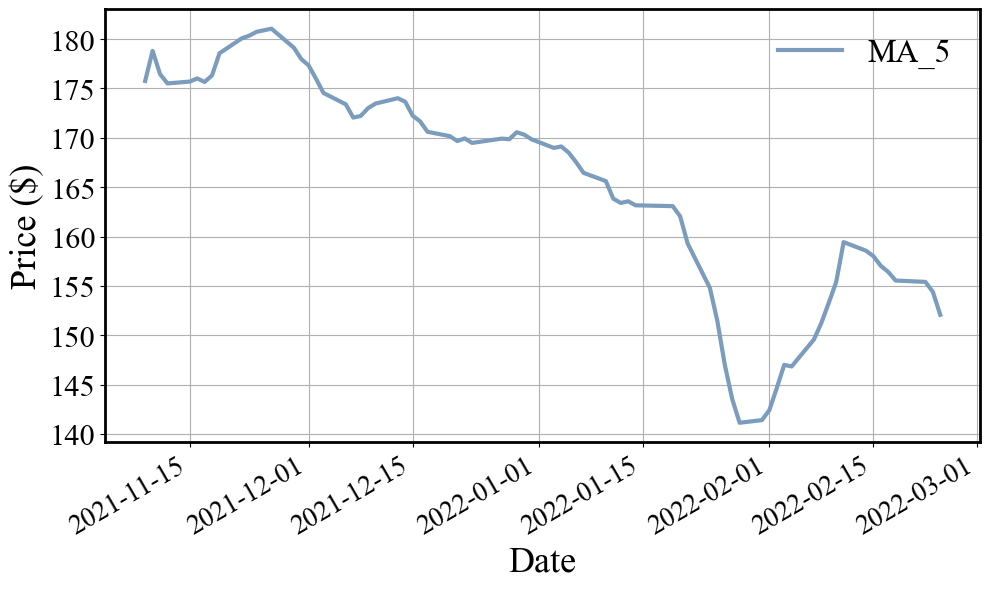

In [38]:
mod.plot_MA5_trend()

C:\Users\Pragyansh_Singh\AppData\Local\Temp\ipykernel_21076\401639039.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])


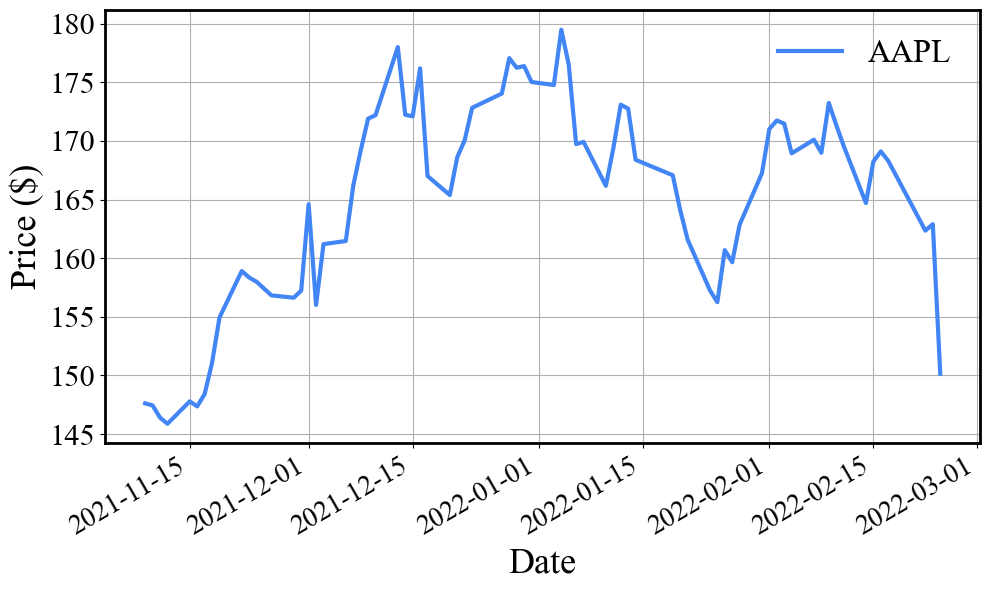

In [20]:
mod.plot_opening_trend()

C:\Users\Pragyansh_Singh\AppData\Local\Temp\ipykernel_21076\401639039.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])


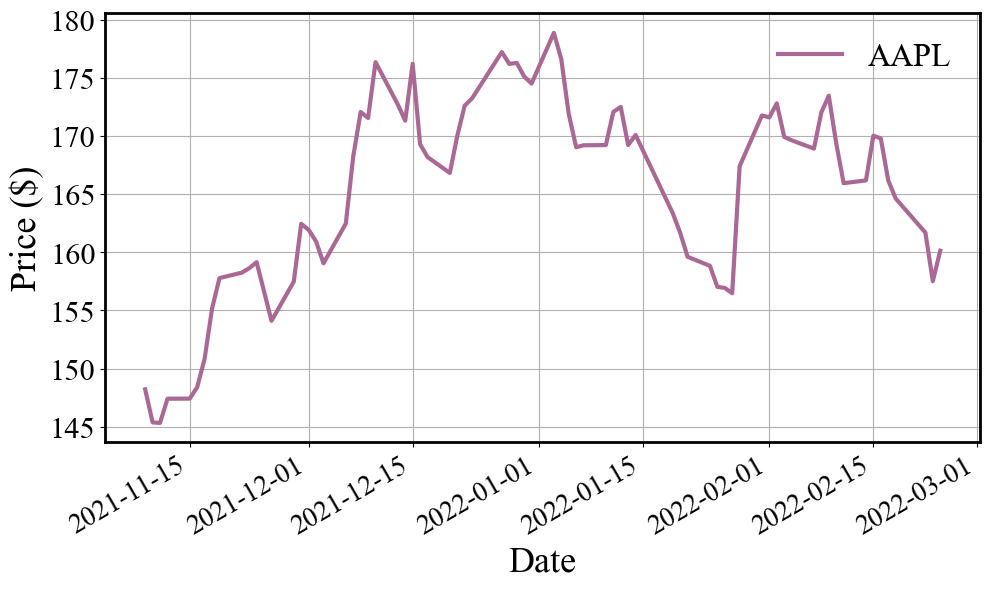

In [21]:
mod.plot_closing_trend()

C:\Users\Pragyansh_Singh\AppData\Local\Temp\ipykernel_21076\401639039.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])


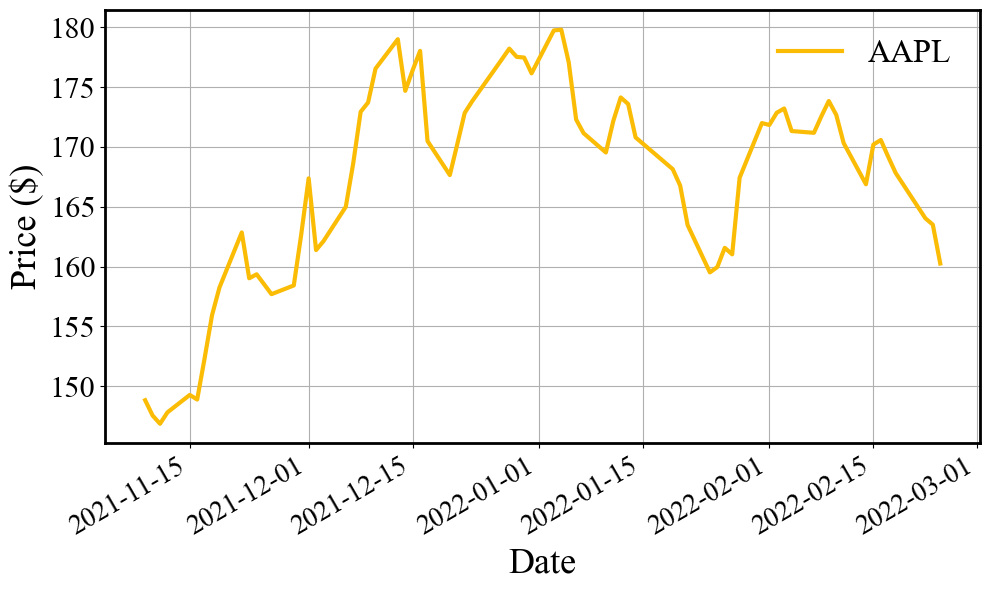

In [22]:
mod.plot_highest_price_trend()

C:\Users\Pragyansh_Singh\AppData\Local\Temp\ipykernel_21076\401639039.py:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  data.iloc[0, data.columns.get_loc('MA_5')] = float(data.iloc[0]['Open'])


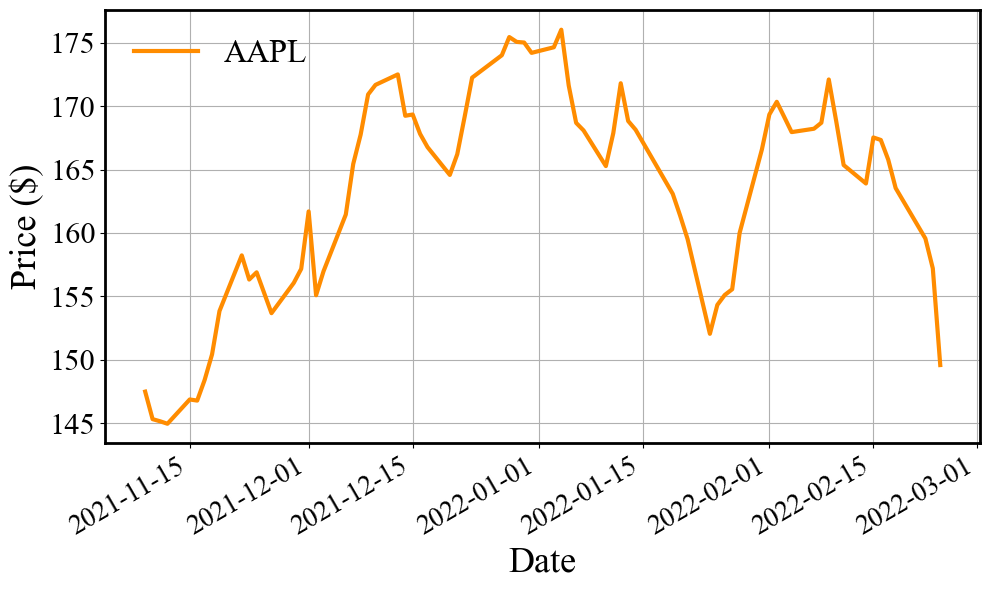

In [23]:
mod.plot_lowest_price_trend()